# Aplicação

Artigo do Scikit-Learn sobre [Ávores de Decisão e Regressão](https://scikit-learn.org/stable/modules/tree.html).

## DecisionTreeClassifier

A implementação do Scikit-Learn da Árvore de Decisão (bem próxima ao C4.5).

Parâmentros:

* **criterion**
  * Função para medir a qualidade de uma divisão. Pode ser um dos três seguintes valores: gini (padrão), entropy e log_loss.
* **splitter**
  * A estratégia usada para escolher a divisão em cada nó/nodo. Dois valores possíveis: best (padrão) e random.
* **max_depth**
  * A profundidade máxima da árvore. Pode ser um valor inteiro, ou None (padrão). A partir do None os nós/nodos serão expandidos até que todas as folhas sejam puras ou contenham menos de `min_samples_split` amostras.
* **min_samples_split**
  * O número mínimo de amostras (ou instâncias) requeridas para dividir um nó interno. Pode receber qualquer valor int ou float; o valor padrão é 2.
* **min_samples_leaf**
  * O número mínimo de amostras requerido para um nó folha. Pode ser qualquer valor int ou float; o valor padrão é 1.
* **min_weight_fraction_leaf**
  * A fração ponderada mínima da soma total dos pesos requeridos para estarem em um nó folha. Pode ser qualquer valor float; o valor padrão é 0.0.
* **max_features**
  * O número de atributos a considerar durante a divisão. Pode receber um valor int, float, sqrt (raiz quadrada) ou log2; o valor padrão é None. Para cada tipo de valor há uma regra associada.
* **random_state**
* **max_leaf_nodes**
  * Quantidade máxima de nós folha. Pode receber um valor inteiro, ou None (padrão). No caso deste último valor, a árvore poderá ter uma quantidade ilimitada de nós folha.
* **min_impurity_decrease**
  * Um nó será dividido se essa divisão induz uma diminuição da impureza maior ou igual a este valor. Recebe qualquer valor float, e é 0.0 por padrão.
* **class_weight**
  * Pesos associados às classes.
* **ccp_alpha**
  * Parâmetro de complexidade usado para a Poda de Custo de Complexidade Mínimo.
* **monotonic_cst**
  * Indica a restrição de monotonicidade a ser forçada em cada atributo.

Atributos:

* classes_
* max_features_
* n_classes_
* n_features_in_
* feature_names_in_
* n_outputs_
* tree_

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Carregando a base Iris
X, y = load_iris(return_X_y=True)

arvore = DecisionTreeClassifier()
arvore.fit(X, y)

DecisionTreeClassifier()

In [3]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Dicionário para mapear cada classe
classes = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}

# DataFrame do conjunto original
df = pd.DataFrame(X, columns=['Comprimento das Sépalas', 
                              'Largura das Sépalas', 
                              'Comprimento das Pétalas', 
                              'Largura das Pétalas'])

df['Espécie'] = y
df['Espécie'] = df['Espécie'].apply(lambda i:classes[i])

In [4]:
# Classificação feita pela árvore
y_prevs = arvore.predict(X)

# DataFrame com os rótulos previstos
df_prevs = df.copy()
df_prevs['Espécie'] = y_prevs
df_prevs['Espécie'] = df_prevs['Espécie'].apply(lambda i:classes[i])

Text(0.5, 1.0, 'b) Rótulos previstos')

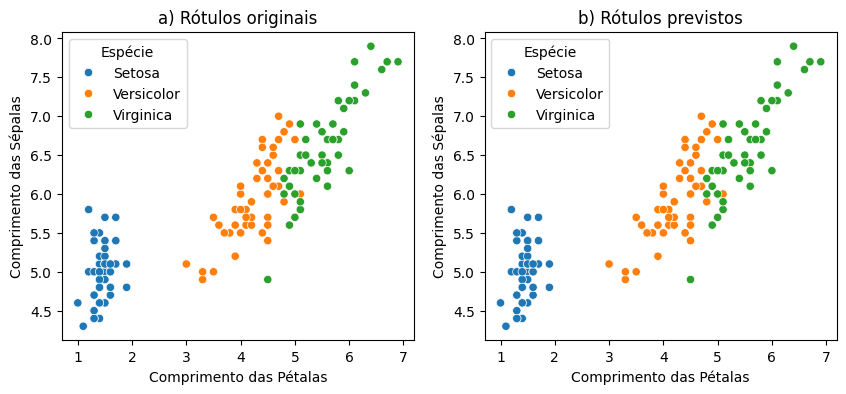

In [5]:
# Gráficos de distribuição dos dados originais e previstos
fig, axes = plt.subplots(1, 2, figsize = (10, 4))

sb.scatterplot(x = df['Comprimento das Pétalas'],
               y = df['Comprimento das Sépalas'],
               hue = df['Espécie'], ax=axes[0])

sb.scatterplot(x = df_prevs['Comprimento das Pétalas'],
               y = df_prevs['Comprimento das Sépalas'],
               hue = df_prevs['Espécie'],
               ax=axes[1])

axes[0].set_title('a) Rótulos originais')
axes[1].set_title('b) Rótulos previstos')

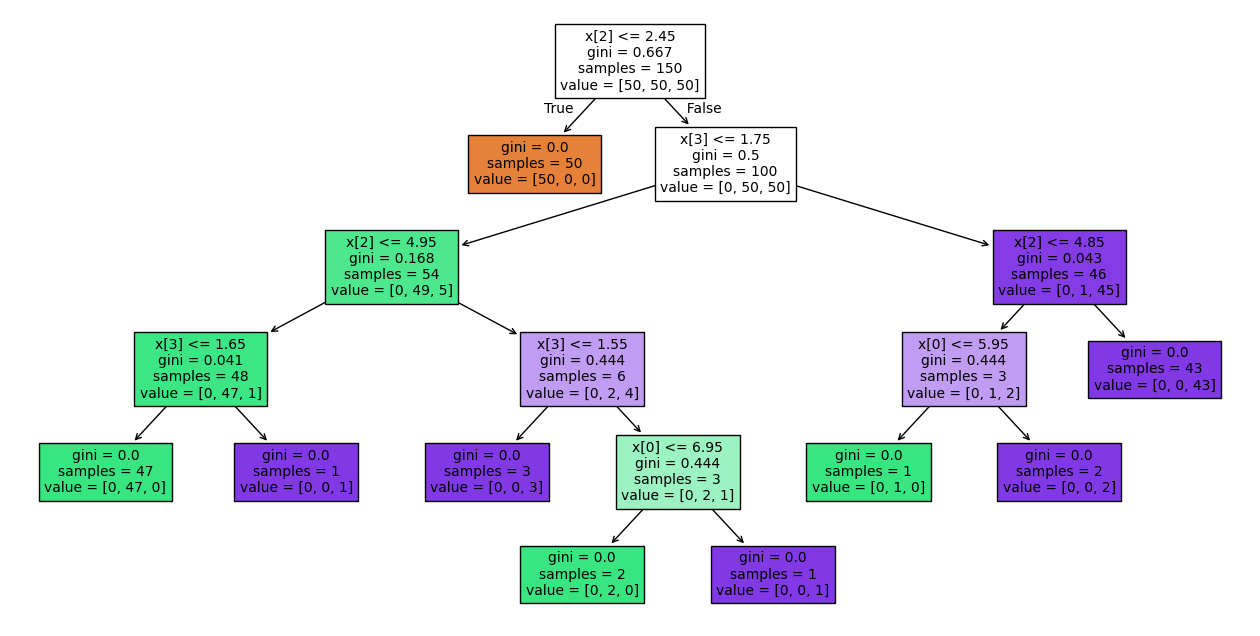

In [6]:
# Plotando a árvore
import sklearn.tree


fig, ax = plt.subplots(figsize=(16, 8))
# A árvore será preenchida pela cor da classe que predomina no nó
tree = sklearn.tree.plot_tree(arvore, max_depth=1000, fontsize=10, filled=True, ax=ax)

## DecisionTreeRegressor

TODO: parâmetros e atributos

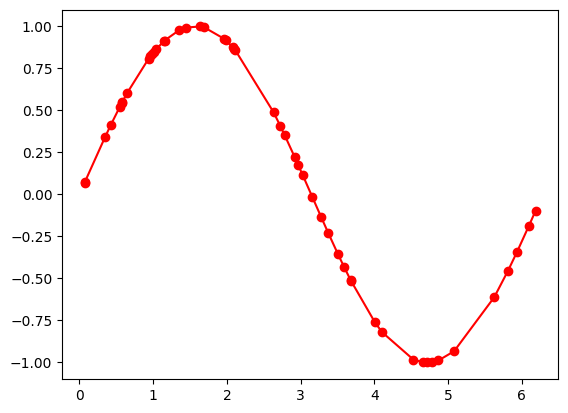

In [8]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

XR = np.sort(2*np.pi * np.random.rand(50, 1), axis=0)
yR = np.sin(XR).ravel()

plt.plot(XR, yR, 'ro-')

In [11]:
# Treinando com 2 níveis de profundidade

modeloR2 = DecisionTreeRegressor(max_depth=2)
modeloR4 = DecisionTreeRegressor(max_depth=4)

# Treinamento
modeloR2.fit(XR, yR)
modeloR4.fit(XR, yR)

# Previsão
yR2_prevs = modeloR2.predict(XR)
yR4_prevs = modeloR4.predict(XR)

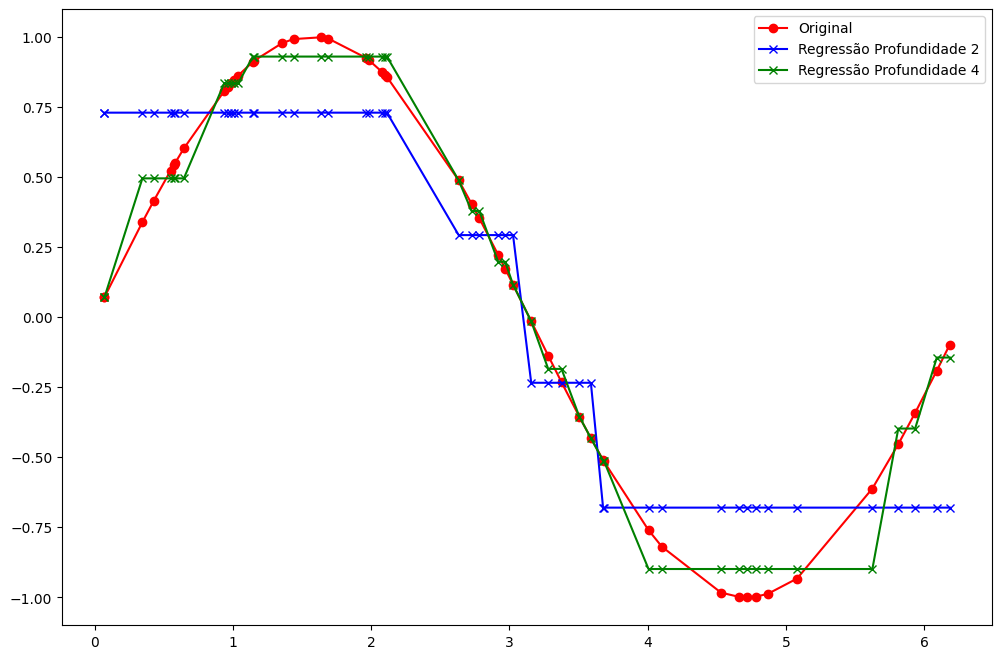

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(XR, yR, 'ro-', label='Original')
plt.plot(XR, yR2_prevs, 'bx-', label='Regressão Profundidade 2')
plt.plot(XR, yR4_prevs, 'gx-', label='Regressão Profundidade 4')
plt.legend()

Text(0.5, 1.0, 'b) Profundidade 4')

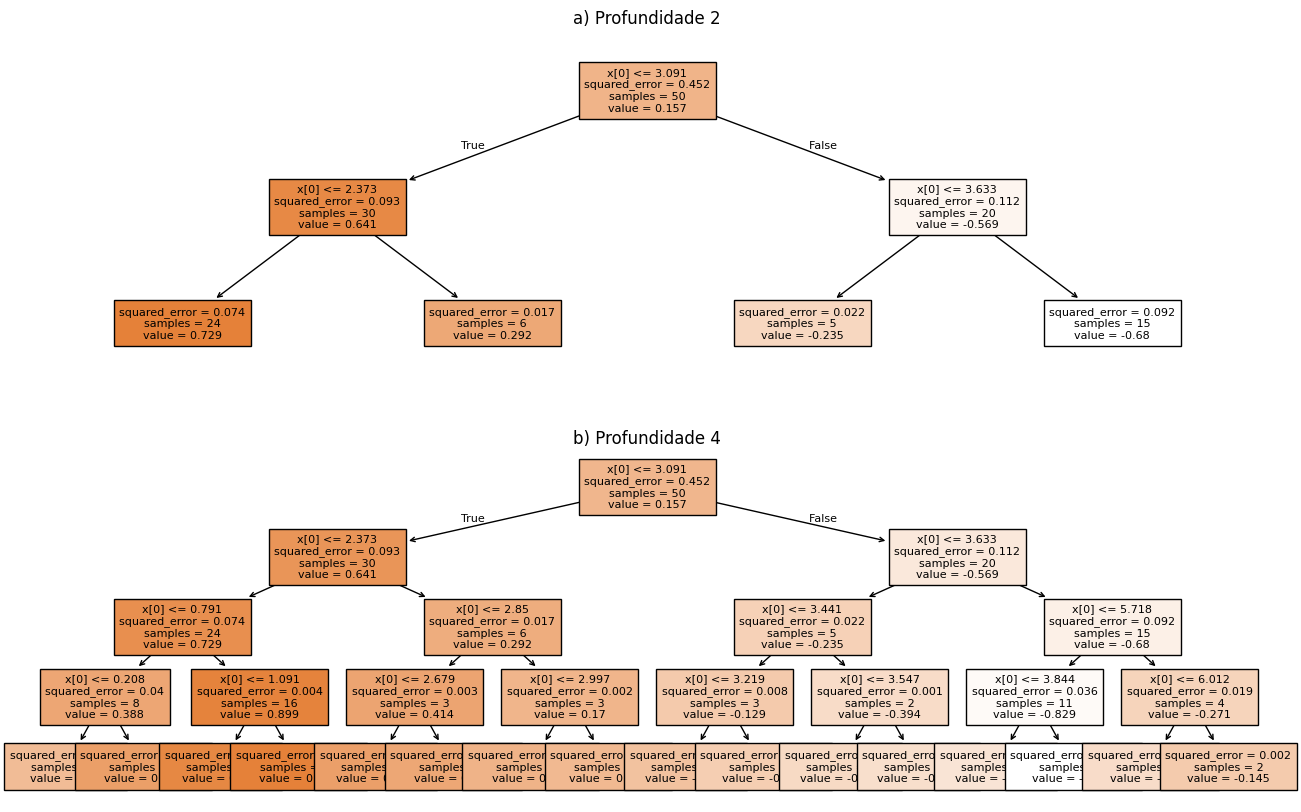

In [13]:
fig, ax = plt.subplots(2, 1, figsize=(16, 10))
arvoreR2 = sklearn.tree.plot_tree(modeloR2, fontsize=8, filled=True, ax=ax[0])
arvoreR4 = sklearn.tree.plot_tree(modeloR4, fontsize=8, filled=True, ax=ax[1])
ax[0].set_title('a) Profundidade 2')
ax[1].set_title('b) Profundidade 4')

## Amostragem e avaliação

Nos exemplos vistos acima, principalmente na classificação, vimos que a Árvore de Decisão **decorou** a saída desejada para todas as instâncias. Ou seja, um `overfitting`. Agora vamos utilizar duas das técnicas de separação de dados: `hold-out` e `cross-validation`.

In [22]:
# HOLD-OUT
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Xh, yh = load_iris(return_X_y=True)

acc = []
tt = np.arange(0.1, 1, 0.1)
for t in tt:
    X_treino, X_teste, y_treino, y_teste = train_test_split(Xh, yh, test_size=t, random_state=42)
    modeloHO = DecisionTreeClassifier(random_state=42)
    modeloHO.fit(X_treino, y_treino)
    acc.append(accuracy_score(y_teste, modeloHO.predict(X_teste))*100)
    
pd.DataFrame(acc, index=tt*100, columns=['Acurácia'])


,Acurácia
10.0,100.000000
20.0,100.000000
30.0,100.000000
40.0,96.666667
50.0,90.666667
60.0,97.777778
70.0,92.452830
80.0,93.333333
90.0,95.555556


In [25]:
# CROSS-VALIDATION
from sklearn.model_selection import cross_val_score

Xc, yc = load_iris(return_X_y=True)

dfCV = pd.DataFrame()
for r in range(1, 5, 1):
    modeloCV = DecisionTreeClassifier(random_state=r)
    s = 'Acurácia R' + str(r)
    cv_score = cross_val_score(modeloCV, Xc, yc, cv=10, scoring='accuracy')*100
    cv_score = np.append(cv_score, sum(cv_score)/10)
    dfCV[s] = cv_score
    
dfCV

,Acurácia R1,Acurácia R2,Acurácia R3,Acurácia R4
0,100.000000,100.000000,100.000000,100.000000
1,93.333333,93.333333,93.333333,93.333333
2,100.000000,100.000000,100.000000,100.000000
3,93.333333,93.333333,93.333333,93.333333
4,93.333333,93.333333,93.333333,93.333333
5,86.666667,86.666667,86.666667,86.666667
6,93.333333,93.333333,93.333333,93.333333
7,93.333333,100.000000,100.000000,100.000000
8,100.000000,100.000000,100.000000,100.000000
9,100.000000,100.000000,100.000000,100.000000


In [28]:
# HOLD-OUT usado na Regressão
from sklearn.metrics import root_mean_squared_error


Xh = np.sort(2*np.pi * np.random.rand(50, 1), axis=0)
yh = np.sin(Xh).ravel()

mse=[]
tt = np.arange(0.1, 1, 0.1)
for t in tt:
    X_treino, X_teste, y_treino, y_teste = train_test_split(Xh, yh, test_size=t, random_state=42)
    modeloHO = DecisionTreeRegressor(random_state=42)
    modeloHO.fit(X_treino, y_treino)
    mse.append(root_mean_squared_error(y_teste, modeloHO.predict(X_teste))*100)
    
pd.DataFrame(mse, index=tt*100, columns=['MSE'])

,MSE
10.0,4.200139
20.0,4.942142
30.0,5.022742
40.0,13.076106
50.0,13.117032
60.0,13.750719
70.0,16.632128
80.0,25.316697
90.0,32.221784


In [30]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score

Xc = np.sort(2*np.pi * np.random.rand(50, 1), axis=0)
yc = np.sin(Xh).ravel()

dfCV = pd.DataFrame()
for d in range(2, 10, 1):
    modeloCV = DecisionTreeRegressor(max_depth=d)
    s = 'MSE D=' + str(d)
    cv_score = cross_val_score(modeloCV, Xc, yc, cv=10, scoring='neg_mean_squared_error')*100
    cv_score = np.append(cv_score, sum(cv_score)/10)
    dfCV[s] = cv_score

dfCV

,MSE D=2,MSE D=3,MSE D=4,MSE D=5,MSE D=6,MSE D=7,MSE D=8,MSE D=9
0,-41.720474,-25.219986,-23.632944,-22.405345,-22.405345,-22.405345,-22.405345,-22.405345
1,-3.313601,-1.834559,-0.746886,-0.903491,-1.027112,-1.020731,-1.020731,-1.020731
2,-10.378993,-3.603779,-1.713665,-0.174088,-0.091015,-0.066283,-0.030388,-0.030388
3,-3.101120,-5.794651,-3.065063,-1.537764,-1.244294,-1.234361,-1.228189,-1.228189
4,-3.926484,-5.839333,-6.621901,-0.643894,-0.609944,-0.609944,-0.609944,-0.609944
5,-19.502547,-7.235233,-4.400379,-3.258539,-3.258539,-3.258539,-3.258539,-3.258539
6,-15.152522,-17.626322,-17.758948,-17.380827,-17.380827,-17.380827,-17.380827,-17.380827
7,-4.600245,-0.560772,-0.162415,-0.181730,-0.083565,-0.083565,-0.083565,-0.083565
8,-6.266429,-1.625651,-3.633451,-2.713371,-2.670702,-2.659325,-2.653745,-2.653745
9,-21.038220,-26.341688,-19.753889,-19.753889,-19.753889,-19.753889,-19.753889,-19.753889
